In [204]:
#import all the libraries files
import pickle   
import matplotlib.cm as cm  #for making plots
import matplotlib.pyplot as plt
import numpy as np # for scientific calcualation
import tensorflow as tf  #Machine Learnig
import pandas as pd #for Dataframe
import matplotlib.image as mpimg

In [205]:
#unzip the data from the pickle file

with open('train_image.pkl', 'rb') as f:
    data = pickle.load(f)
with open('train_label.pkl', 'rb') as f:
    label = pickle.load(f)
with open('test_image.pkl', 'rb') as f:
    test = pickle.load(f)


print("length of training data : " + str(len(data)))
print("length of label data: " + str(len(label)))
print("length of test data: " + str(len(test)))
print(label)

length of training data : 8000
length of label data: 8000
length of test data: 2000
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

8000
6


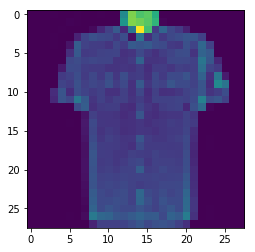

In [206]:
#store the data in the list

data = np.asarray(data)
test = np.asarray(test)
shape = (28,28,1)
final_data = []
test_data = []
for i in range(8000):
    final_data.append(data[i].reshape(shape))
for i in range(2000):
    test_data.append(test[i].reshape(shape))
print(len(final_data))
plt.imshow(final_data[7999][:,:,0])
print(label[7999])

In [207]:
print(len(test_data))

2000


In [208]:
#shuffle the list

def shuffle_list(train_list,label_list):
    if(len(train_list) == len(label_list)):
        length = len(train_list)
        shuffle_indices = np.random.permutation(length)
        n_list = [0 for _ in range(length)]
        n_label = [0 for _ in range(length)]
        for i,si in enumerate(shuffle_indices):
            n_list[i] = train_list[si]
            n_label[i] = label_list[si]
        return n_list, n_label
    else:
        raise Expection('Image and Labels size do not match')
        

6


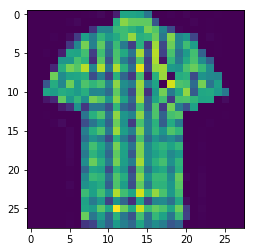

In [209]:
#show the image as greyscale
plt.imshow(final_data[7894][:,:,0])
print(label[7984])

In [210]:
#batch generator for test

def batch_generator_test(test_list, batch_size):
    images = []
    cursor = 0
    length = len(test_list)
    print(length)
    while cursor + batch_size <= length:
        images = train_list[cursor : cursor + batch_size]
        cursor = cursor + batch_size
        yield images
    return

In [211]:
#one hot encoding
def one_hot(label_list,label):
    label = tf.constant(label, name = "label")
    one_hot_matrix = tf.one_hot(label_list, label, axis = 1)
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    return one_hot

In [212]:
for i in range(8000):
    if(label[i] == 6):
        label[i] = 1
label_list = one_hot(label,4)
print(label_list[7999])
print(label[7999])

[0. 1. 0. 0.]
1


In [213]:
#prepare the training list and validation list

def prepare_list(train_list, label_list):
    train_list, label_list = shuffle_list(train_list, label_list)
    print("image_list  " + str(len(train_list)))
    print("label_list " + str(len(label_list)))
    val_train_list, val_label_list = shuffle_list(train_list, label_list)
    return train_list,label_list,val_train_list[0:2000],val_label_list[0:2000]

In [214]:
#batch geneartor for sending the images in batches
def batch_generator(train_list, label_list, batch_size):
    images = []
    labels = []
    cursor = 0
    length = len(train_list)
    while cursor + batch_size <= length:
        images = train_list[cursor : cursor + batch_size]
        labels = label_list[cursor : cursor + batch_size]
        cursor = cursor + batch_size
        yield images, labels
    return

In [215]:

n_H = 28
n_W = 28
n_C = 1
n_y = 4
batch_size = 100
learning_rate = 0.001
epoches = 50

tf.reset_default_graph()

train_list, label_list, val_train_list, val_label_list = prepare_list(final_data,label_list)
print(label_list)

image_list  8000
label_list 8000
[array([0., 0., 0., 1.], dtype=float32), array([0., 0., 1., 0.], dtype=float32), array([0., 1., 0., 0.], dtype=float32), array([1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 1.], dtype=float32), array([0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 1.], dtype=float32), array([1., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0.], dtype=float32), array([0., 0., 1., 0.], dtype=float32), array([1., 0., 0., 0.], dtype=float32), array([0., 0., 1., 0.], dtype=float32), array([0., 0., 0., 1.], dtype=float32), array([0., 0., 0., 1.], dtype=float32), array([1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 1.], dtype=float32), array([0., 0., 1., 0.], dtype=float32), array([1., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0.], dtype=float32), array([0., 0., 1., 0.], dtype=float32), array([0., 0., 1., 0.], dtype=float32), array([1., 0., 0., 0.], dtype=float32), array([0., 0., 0., 1.], dtype=float32), array([0., 0., 0., 1.], dtype=float32), array(

In [216]:
X = tf.placeholder(tf.float32, [None, n_H, n_W, n_C])
Y = tf.placeholder(tf.float32, [None, n_y])

In [217]:
W1 = tf.get_variable("W1", [3, 3, 1, 32], initializer = tf.contrib.layers.xavier_initializer())
W2 = tf.get_variable("W2", [3, 3, 32, 64], initializer = tf.contrib.layers.xavier_initializer())
W3 = tf.get_variable("W3", [3, 3, 64, 128], initializer = tf.contrib.layers.xavier_initializer())

In [ ]:
Z1 = tf.nn.conv2d(X, W1, strides = [1, 1, 1, 1], padding = 'SAME')
A1 = tf.nn.relu(Z1)

P2 = tf.nn.max_pool(A1, ksize = [1, 3, 3, 1], strides = [1, 2, 2, 1], padding = 'SAME')

Z3 = tf.nn.conv2d(P2, W2, strides = [1, 1, 1, 1], padding = 'SAME')
A3 = tf.nn.relu(Z3)

P4 = tf.nn.max_pool(A3, ksize = [1, 3, 3, 1], strides = [1, 2, 2, 1], padding = 'SAME')

Z5 = tf.nn.conv2d(P4, W3, strides = [1, 1, 1, 1], padding = 'SAME')
A5 = tf.nn.relu(Z5)

P6 = tf.nn.max_pool(A5, ksize = [1, 3, 3, 1], strides = [1, 2, 2, 1], padding = 'SAME')

flatten = tf.contrib.layers.flatten(P6)

Z8 = tf.contrib.layers.fully_connected(flatten, 256)

Z10 = tf.contrib.layers.fully_connected(Z8, 4, activation_fn = None)

prediction = tf.nn.softmax(Z10)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z10, labels = Y ))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(Z10), axis = 1), tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    print("Restoring Parameters")
    
    try:
        saver.restore(sess, "./temp/parameters.ckpt")
        print("Parameters Restored")
    except:
        print("Parameters not Available")
     
    
    losses = []
    accuracies = []
    
    for epoch in range(epoches):
        
        print("Training on {} epochs".format(epoch+1))
        train_gen = batch_generator(train_list, label_list, batch_size)
        iteration = 0
        acc_list = []
        loss_list = []
        for images, labels in train_gen:
            iteration += 1
            feed_dict = {X: images, Y: labels}
            _, loss, acc = sess.run([optimizer, cost, accuracy],  feed_dict=feed_dict)
            acc_list.append(acc)
            loss_list.append(loss)
            saver.save(sess, "./temp/parameters.ckpt")
        print('{} iteration completed'.format(iteration))
        print('accuracy and loss is {} and {}'.format(np.mean(acc)*100,np.mean(loss)))
        losses.append(np.mean(loss_list))
        accuracies.append(np.mean(acc_list))
        
        step = 0
        accuracy_val = 0
        loss_val = 0
        val_gen = batch_generator(val_train_list, val_label_list, batch_size)
        for val_x, val_y in val_gen:
            step += 1
            feed_dict = {X : val_x, Y : val_y}
            
            ac, l = sess.run([accuracy, cost], feed_dict = feed_dict)
            accuracy_val += ac
            loss_val += l
        
        loss_val /= step
        accuracy_val /= step
        
        print("Loss and Accuracy on validation set is {} and {} ".format(accuracy_val*100, loss_val))
        

    test_labels = np.array([], dtype = int)
    test_gen = batch_generator_test(test_data, 50)

    step = 0
    for test_x in test_gen:
        step += 1
        feed_dict = {X : test_x}
        test_pred = sess.run(prediction, feed_dict = feed_dict)
        test_labels = np.r_[test_labels, np.argmax(test_pred, axis = 1)]
    for i in range(2000):
        if(test_labels[i] == 1):
            test_labels[i] = 6
    
        

Restoring Parameters
INFO:tensorflow:Restoring parameters from ./temp/parameters.ckpt
Parameters not Available
Training on 1 epochs
80 iteration completed
accuracy and loss is 82.99999833106995 and 0.5107816457748413
Loss and Accuracy on validation set is 86.74999982118607 and 0.3378386214375496 
Training on 2 epochs
80 iteration completed
accuracy and loss is 87.00000047683716 and 0.4141978919506073
Loss and Accuracy on validation set is 90.09999990463257 and 0.2703960403800011 
Training on 3 epochs
80 iteration completed
accuracy and loss is 85.00000238418579 and 0.3443445563316345
Loss and Accuracy on validation set is 91.700000166893 and 0.2243619218468666 
Training on 4 epochs
80 iteration completed
accuracy and loss is 88.99999856948853 and 0.3002181947231293
Loss and Accuracy on validation set is 92.65000015497208 and 0.19022866785526277 
Training on 5 epochs
80 iteration completed
accuracy and loss is 89.99999761581421 and 0.2680818438529968
Loss and Accuracy on validation set 

In [ ]:
df = pd.read_csv("Shubham_Srivastava.csv")
df.drop(df.index, inplace=True)

In [ ]:
epochs = list(range(25))
plt.plot(epochs, np.log(losses), label="Losses")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(epochs, accuracies, label="Accuracy")
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


for i in range(0,2000):
    df = df.append({'image_index': int(i)}, ignore_index=True)
df['image_index'] = df['image_index'].apply(lambda x: int(x))

In [ ]:
print(len(test_labels))
print(len(df['class']))
df['class'] = test_labels

In [ ]:
df.to_csv("Shubham_Srivastava.csv", index=False)